# Tertiary analysis of a Donor-to-Recipient pipeline

## Set multithreading parameters

In [1]:
parallel::detectCores()

[1] 24

In [2]:
options(Ncpus = parallel::detectCores())

In [3]:
Sys.setenv(OMP_NUM_THREADS=toString(parallel::detectCores()))
Sys.setenv(OMP_THREAD_LIMIT=toString(parallel::detectCores()))
Sys.setenv("OMP_NUM_THREADS"=parallel::detectCores())
Sys.setenv("OMP_THREAD_LIMIT"=parallel::detectCores())

## Install and import libraries

### Bioconductor libraries

In [ ]:
# MOVE THIS TO THE DOCKERFILE TO BAKE INTO INTO THE DOCKER IMAGE
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("GenomicAlignments")
BiocManager::install("Rsubread")
BiocManager::install("Rsamtools")
BiocManager::install("bamsignals")
BiocManager::install("rtracklayer")
BiocManager::install("GenomicRanges")
BiocManager::install("BSgenome.Hsapiens.UCSC.hg38")
BiocManager::install("TxDb.Hsapiens.UCSC.hg38.knownGene")
BiocManager::install("regioneR")
BiocManager::install("karyoploteR")
BiocManager::install("seqinr")

In [5]:
suppressMessages(library(GenomicAlignments))
suppressMessages(library(Rsubread))
suppressMessages(library(Rsamtools))
suppressMessages(library(bamsignals))
suppressMessages(library(rtracklayer))
suppressMessages(library(GenomicRanges))
suppressMessages(library(repr))
suppressMessages(library(BSgenome.Hsapiens.UCSC.hg38))
suppressMessages(library(TxDb.Hsapiens.UCSC.hg38.knownGene))
suppressMessages(library(regioneR))
suppressMessages(library(karyoploteR))
suppressMessages(library(seqinr))

### CRAN libraries

In [6]:
# MOVE THIS TO THE DOCKERFILE TO BAKE INTO INTO THE DOCKER IMAGE
suppressMessages(install.packages("shinyLP"))
suppressMessages(install.packages("plotly"))
suppressMessages(install.packages("tidyverse"))
suppressMessages(install.packages("ggplot2"))

In [7]:
suppressMessages(library(shinyLP))
suppressMessages(library(plotly))
suppressMessages(library(tidyverse))
suppressMessages(library(ggplot2))

## Variables

In [8]:
donor_name <- "sars-cov-2"
recipient_name <- "USCShg38"
srr_name <- "SRR12091998"

In [10]:
paste(srr_name, '-to-', donor_name, sep = "")

[1] "SRR12091998-to-sars-cov-2"

In [11]:
data_folder <- "../../wallaby/data/"
outputs_folder <- "../../wallaby/workflows/cromwell-final-outputs/

In [12]:
donor_ref_genome <- paste(data_folder, "ref_genomes/hpv/HPV16.fasta", sep = "")
recipient_ref_genome <- paste(data_folder, "ref_genomes/human/USCS.hg38.fasta", sep = "")

## Loading pipeline output files
Try to open all files - note that some will not exists as that specific crossing bucket did not return any matches

In [17]:
list.files(path = "../../wallaby/processed_data/")

[1] "binaries"        "cromwell_config" "data"            "diagrams"       
 [5] "docker"          "legacy"          "LICENSE"         "notebooks"      
 [9] "processed_data"  "README.md"       "workflows"

In [ ]:
list.files(path = "../../wallaby/")

In [31]:
# Variables to hold all file paths  
try(reads_to_donor_MMd_MMr.bam <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MMd_MMr.bam", sep = ""))
try(reads_to_donor_MMd_MUr.bam <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MMd_MUr.bam", sep = ""))
try(reads_to_donor_MMd_UMr.bam <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MMd_UMr.bam", sep = ""))
try(reads_to_donor_MMd_UUr.bam <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MMd_UUr.bam", sep = ""))
try(reads_to_donor_MUd_MMr.bam <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MUd_MMr.bam", sep = ""))
try(reads_to_donor_MUd_MUr.bam <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MUd_MUr.bam", sep = ""))
try(reads_to_donor_MUd_UMr.bam <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MUd_UMr.bam", sep = ""))
try(reads_to_donor_MUd_UUr.bam <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MUd_UUr.bam", sep = ""))
try(reads_to_donor_UMd_MMr.bam <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UMd_MMr.bam", sep = ""))
try(reads_to_donor_UMd_MUr.bam <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UMd_MUr.bam", sep = ""))
try(reads_to_donor_UMd_UMr.bam <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UMd_UMr.bam", sep = ""))
try(reads_to_donor_UMd_UUr.bam <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UMd_UUr.bam", sep = ""))
try(reads_to_donor_UUd_MMr.bam <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UUd_MMr.bam", sep = ""))
try(reads_to_donor_UUd_MUr.bam <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UUd_MUr.bam", sep = ""))
try(reads_to_donor_UUd_UMr.bam <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UUd_UMr.bam", sep = ""))
try(reads_to_donor_UUd_UUr.bam <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UUd_UUr.bam", sep = ""))

In [32]:
# Variables to hold all file paths  
try(reads_to_recipient_MMd_MMr.bam <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MMd_MMr.bam", sep = ""))
try(reads_to_recipient_MMd_MUr.bam <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MMd_MUr.bam", sep = ""))
try(reads_to_recipient_MMd_UMr.bam <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MMd_UMr.bam", sep = ""))
try(reads_to_recipient_MMd_UUr.bam <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MMd_UUr.bam", sep = ""))
try(reads_to_recipient_MUd_MMr.bam <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MUd_MMr.bam", sep = ""))
try(reads_to_recipient_MUd_MUr.bam <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MUd_MUr.bam", sep = ""))
try(reads_to_recipient_MUd_UMr.bam <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MUd_UMr.bam", sep = ""))
try(reads_to_recipient_MUd_UUr.bam <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MUd_UUr.bam", sep = ""))
try(reads_to_recipient_UMd_MMr.bam <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UMd_MMr.bam", sep = ""))
try(reads_to_recipient_UMd_MUr.bam <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UMd_MUr.bam", sep = ""))
try(reads_to_recipient_UMd_UMr.bam <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UMd_UMr.bam", sep = ""))
try(reads_to_recipient_UMd_UUr.bam <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UMd_UUr.bam", sep = ""))
try(reads_to_recipient_UUd_MMr.bam <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UUd_MMr.bam", sep = ""))
try(reads_to_recipient_UUd_MUr.bam <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UUd_MUr.bam", sep = ""))
try(reads_to_recipient_UUd_UMr.bam <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UUd_UMr.bam", sep = ""))
try(reads_to_recipient_UUd_UUr.bam <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UUd_UUr.bam", sep = ""))

In [9]:
# Variables to hold all file paths for blastn results
try(reads_to_donor_MMd_MMr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MMd_MMr.blastn", sep = ""))
try(reads_to_donor_MMd_MUr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MMd_MUr.blastn", sep = ""))
try(reads_to_donor_MMd_UMr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MMd_UMr.blastn", sep = ""))
try(reads_to_donor_MMd_UUr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MMd_UUr.blastn", sep = ""))
try(reads_to_donor_MUd_MMr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MUd_MMr.blastn", sep = ""))
try(reads_to_donor_MUd_MUr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MUd_MUr.blastn", sep = ""))
try(reads_to_donor_MUd_UMr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MUd_UMr.blastn", sep = ""))
try(reads_to_donor_MUd_UUr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MUd_UUr.blastn", sep = ""))
try(reads_to_donor_UMd_MMr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UMd_MMr.blastn", sep = ""))
try(reads_to_donor_UMd_MUr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UMd_MUr.blastn", sep = ""))
try(reads_to_donor_UMd_UMr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UMd_UMr.blastn", sep = ""))
try(reads_to_donor_UMd_UUr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UMd_UUr.blastn", sep = ""))
try(reads_to_donor_UUd_MMr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UUd_MMr.blastn", sep = ""))
try(reads_to_donor_UUd_MUr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UUd_MUr.blastn", sep = ""))
try(reads_to_donor_UUd_UMr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UUd_UMr.blastn", sep = ""))
try(reads_to_donor_UUd_UUr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UUd_UUr.blastn", sep = ""))

In [ ]:
try(reads_to_recipient_MMd_MMr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MMd_MMr.blastn", sep = ""))
try(reads_to_recipient_MMd_MUr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MMd_MUr.blastn", sep = ""))
try(reads_to_recipient_MMd_UMr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MMd_UMr.blastn", sep = ""))
try(reads_to_recipient_MMd_UUr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MMd_UUr.blastn", sep = ""))
try(reads_to_recipient_MUd_MMr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MUd_MMr.blastn", sep = ""))
try(reads_to_recipient_MUd_MUr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MUd_MUr.blastn", sep = ""))
try(reads_to_recipient_MUd_UMr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MUd_UMr.blastn", sep = ""))
try(reads_to_recipient_MUd_UUr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MUd_UUr.blastn", sep = ""))
try(reads_to_recipient_UMd_MMr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UMd_MMr.blastn", sep = ""))
try(reads_to_recipient_UMd_MUr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UMd_MUr.blastn", sep = ""))
try(reads_to_recipient_UMd_UMr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UMd_UMr.blastn", sep = ""))
try(reads_to_recipient_UMd_UUr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UMd_UUr.blastn", sep = ""))
try(reads_to_recipient_UUd_MMr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UUd_MMr.blastn", sep = ""))
try(reads_to_recipient_UUd_MUr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UUd_MUr.blastn", sep = ""))
try(reads_to_recipient_UUd_UMr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UUd_UMr.blastn", sep = ""))
try(reads_to_recipient_UUd_UUr.blastn <- paste(outputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UUd_UUr.blastn", sep = ""))

## List BAM files with more than zero reads (not empty)

In [33]:
print_file_state <- function(file_name) {
    if (file.exists(file_name)) {
        return(paste(basename(file_name)))
    }
}

lapply(c(reads_to_donor_MMd_MMr.bam, reads_to_donor_MMd_MUr.bam, reads_to_donor_MMd_UMr.bam, reads_to_donor_MMd_UUr.bam, 
         reads_to_donor_MUd_MMr.bam, reads_to_donor_MUd_MUr.bam, reads_to_donor_MUd_UMr.bam, reads_to_donor_MUd_UUr.bam, 
         reads_to_donor_UMd_MMr.bam, reads_to_donor_UMd_MUr.bam, reads_to_donor_UMd_UMr.bam, reads_to_donor_UMd_UUr.bam, 
         reads_to_donor_UUd_MMr.bam, reads_to_donor_UUd_MUr.bam, reads_to_donor_UUd_UMr.bam, reads_to_donor_UUd_UUr.bam), print_file_state)

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
NULL

[[15]]
NULL

[[16]]
NULL

## Pipeline metrics visualization

### FASTQ metrics comparison before and after trimming

In [15]:
iframe(width = "100%", height = "500", url_link = paste(outputs_folder, paste(srr_name, sep = ""), "_multiqc_trim_report.html", sep = ""))

Shiny tags cannot be represented in plain text (need html)

### BAM metrics for all crossed BAMs

In [16]:
iframe(width = "100%", height = "500", url_link = paste(outputs_folder, paste(srr_name, '-to-', donor_name, sep = ""), "_multiqc_metrics.html", sep = ""))

Shiny tags cannot be represented in plain text (need html)

In [64]:
iframe(width = "100%", height = "500", url_link = paste(outputs_folder, "multiqc_all_recipient_metrics.html", sep = ""))

Shiny tags cannot be represented in plain text (need html)

## Visualize all reads in donor genome

In [17]:
summary_fasta <- summary(read.fasta(donor_ref_genome) )

In [18]:
summary_fasta_lengths <- summary_fasta[, "Length"]

In [19]:
# Calculate total organism length, adding up all possible separate segments in genome
sequence_sum <- c()
for (item in c(1,length(summary_fasta_lengths))) { sequence_sum <- c(sequence_sum, strtoi(summary_fasta_lengths[[item]])) }
total_genome_length <- sum(sequence_sum)

In [20]:
# Check and change the organism ID below
reads_to_donor_MMd_MMr.bed.gr

ERROR: Error in eval(expr, envir, enclos): object 'reads_to_donor_MMd_MMr.bed.gr' not found


In [21]:
# Building a custom GRanges for a bacterial genome
custom.genome <- toGRanges(data.frame(chr=c("NC_001526.4"), start=c(1), end=c(total_genome_length)))

#### FOR THE NEXT STEP TO WORK, THE ORGANISM NAME IN custom.genome NEEDS TO MATCH THE ONE IN reads_to_donor_MMd_MUr.bed.gr

[1] "Window size for density calculation, in (kb):  159"


ERROR: Error in methods::is(data, "GRanges"): object 'reads_to_donor_MUd_UMr.bed.gr' not found


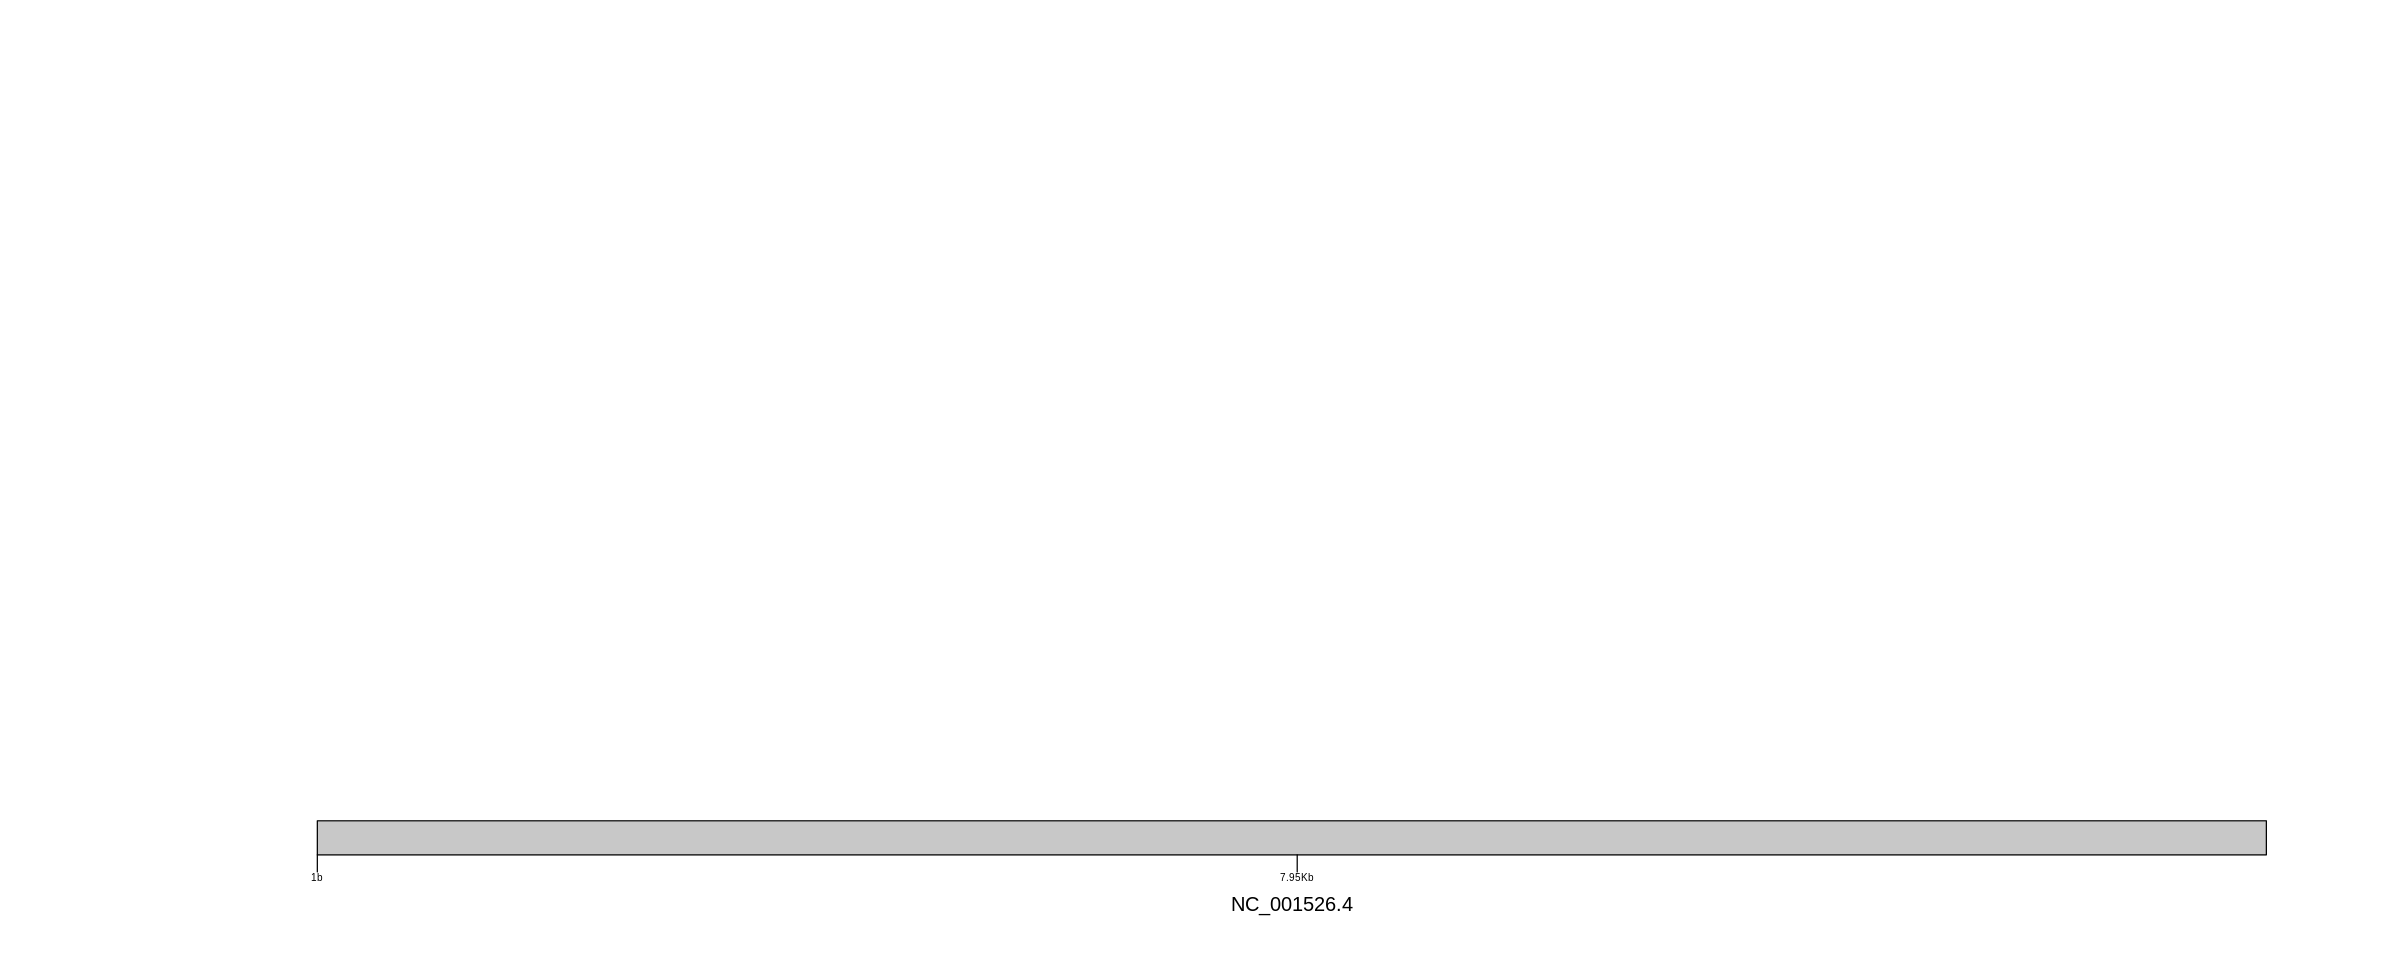

In [23]:
options(repr.plot.width=20, repr.plot.height=8)

plot.type <- 4
tracks <- 2
track_sep <- 0.05
track_width <- 1/(tracks+tracks*0.05)
window.size <- ceiling(total_genome_length/100) # averaged every # reads in window
print(paste("Window size for density calculation, in (kb): ", window.size))
genome = custom.genome

pp <- getDefaultPlotParams(plot.type=plot.type)
pp$leftmargin <- 0.13
kp <- plotKaryotype(genome=genome, plot.type = plot.type, plot.params = pp)
kpAddBaseNumbers(kp, tick.dist = window.size*50, add.units = TRUE)

track_no=1
r0 <- (track_no-1)*track_width+(track_no-1)*track_sep
r1 <- track_no*track_width+(track_no-1)*track_sep
kp <- suppressWarnings(kpPlotDensity(kp, data=reads_to_donor_MUd_UMr.bed.gr, window.size = window.size, col="blue", r0=r0, r1=r1))
kpAxis(kp, ymax=kp$latest.plot$computed.values$max.density, cex=0.8, r0=r0, r1=r1)
kpAddLabels(kp, labels = "donor_MUd_UMr", r0=r0, r1=r1, label.margin = 0.04)

track_no=2
r0 <- (track_no-1)*track_width+(track_no-1)*track_sep
r1 <- track_no*track_width+(track_no-1)*track_sep
kp <- suppressWarnings(kpPlotDensity(kp, data=reads_to_donor_UMd_MUr.bed.gr, window.size = window.size, col="red", r0=r0, r1=r1))
kpAxis(kp, ymax=kp$latest.plot$computed.values$max.density, cex=0.8, r0=r0, r1=r1)
kpAddLabels(kp, labels = "donor_UMd_MUr", r0=r0, r1=r1, label.margin = 0.04)

## Visualize reads in recipient genome

[1] "Window size for density calculation, in (kb):  1e+06"


ERROR: Error in methods::is(data, "GRanges"): object 'reads_to_recipient_MUd_UMr.bed.gr' not found


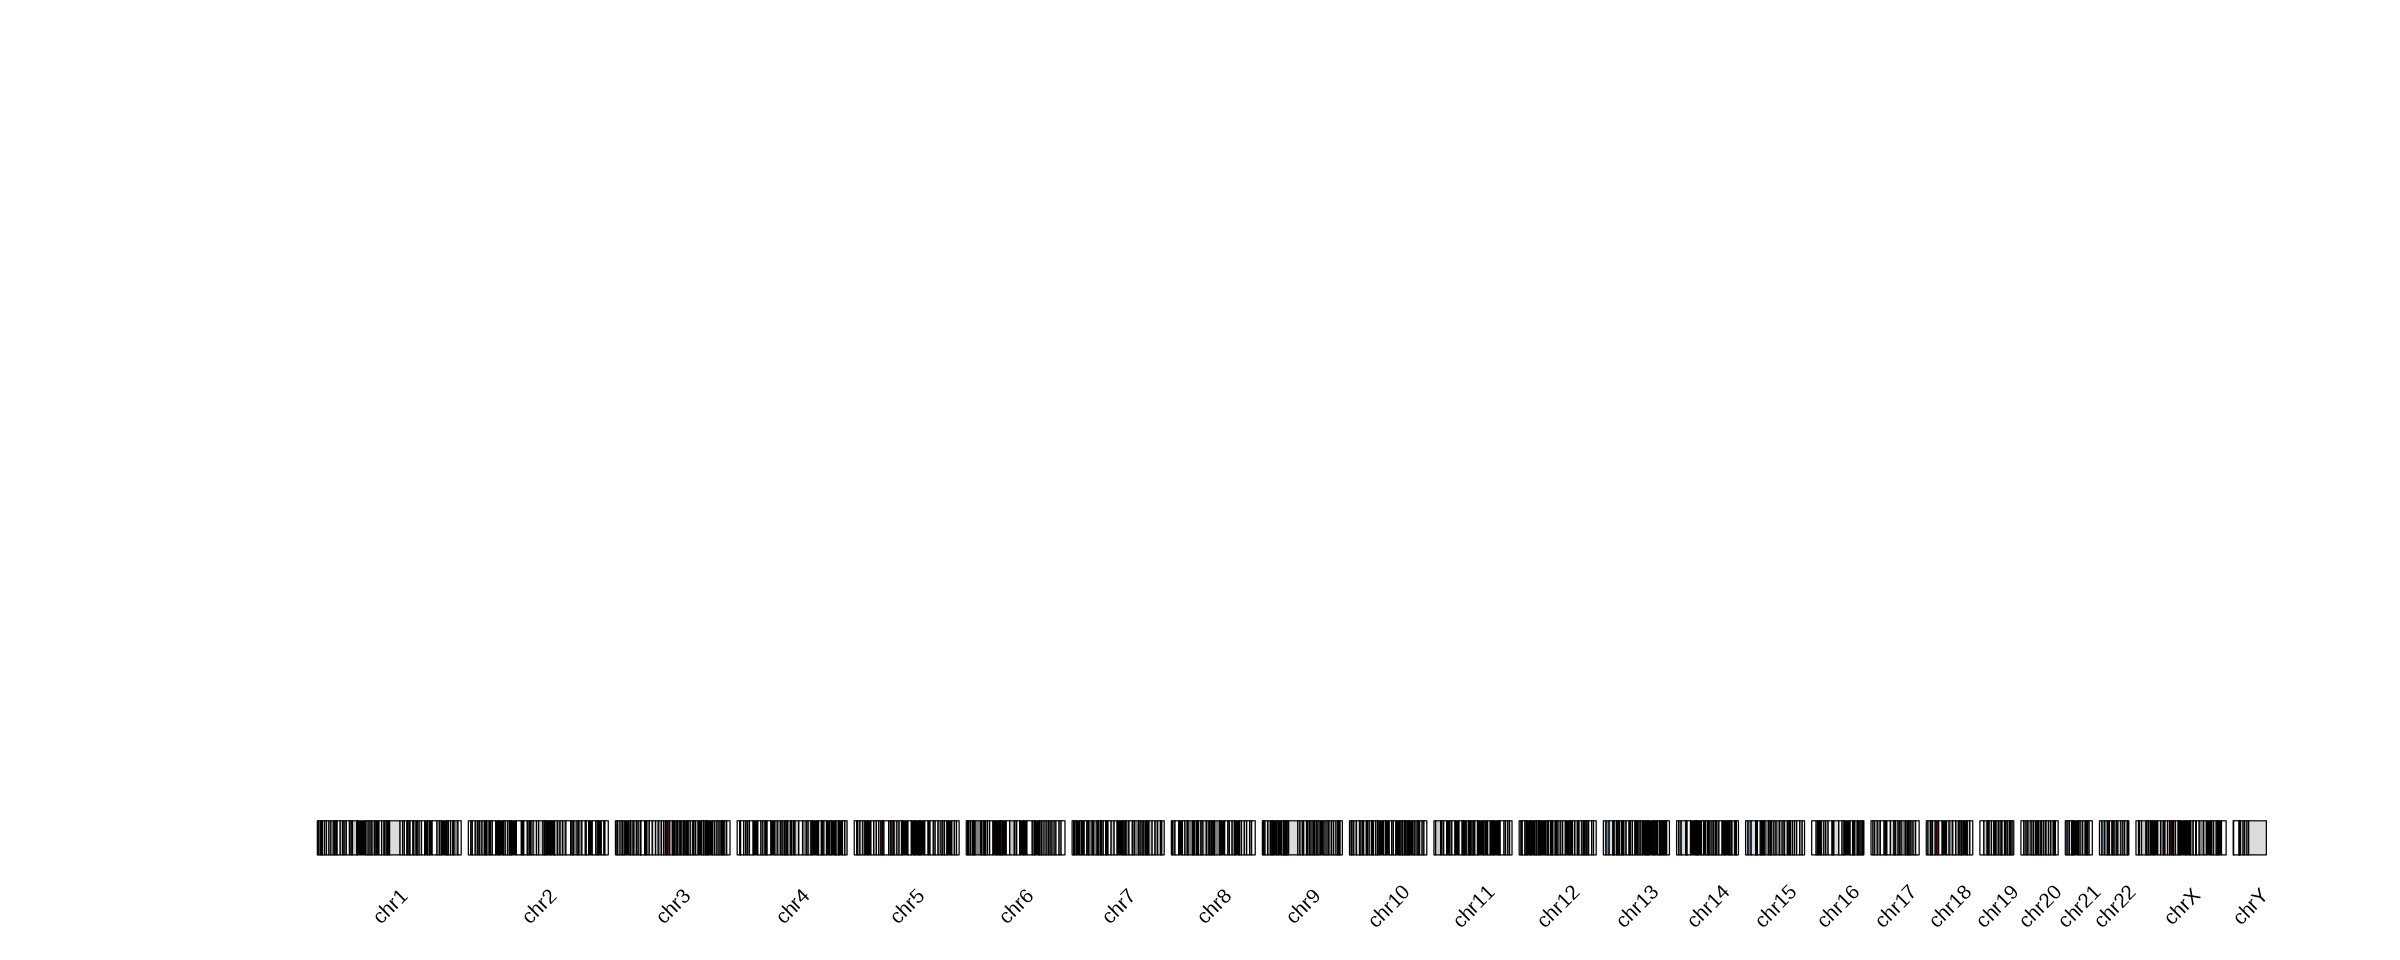

In [24]:
options(repr.plot.width=20, repr.plot.height=8)

plot.type <- 4
tracks <- 2
track_sep <- 0.05
track_width <- 1/(tracks+tracks*0.05)
window.size <- 1e6 # averaged every # reads in window
print(paste("Window size for density calculation, in (kb): ", window.size))
genome = "hg38"

pp <- getDefaultPlotParams(plot.type=plot.type)
pp$leftmargin <- 0.13
kp <- plotKaryotype(genome=genome, plot.type = plot.type, plot.params = pp, labels.plotter = NULL)
kpAddChromosomeNames(kp, srt=45)

track_no=1
r0 <- (track_no-1)*track_width+(track_no-1)*track_sep
r1 <- track_no*track_width+(track_no-1)*track_sep
kp <- suppressWarnings(kpPlotDensity(kp, data=reads_to_recipient_MUd_UMr.bed.gr, window.size = window.size, col="blue", r0=r0, r1=r1))
kpAxis(kp, ymax=kp$latest.plot$computed.values$max.density, cex=0.8, r0=r0, r1=r1)
kpAddLabels(kp, labels = "recipient_MUd_UMr", r0=r0, r1=r1, label.margin = 0.04)

track_no=2
r0 <- (track_no-1)*track_width+(track_no-1)*track_sep
r1 <- track_no*track_width+(track_no-1)*track_sep
kp <- suppressWarnings(kpPlotDensity(kp, data=reads_to_recipient_UMd_MUr.bed.gr, window.size = window.size, col="red", r0=r0, r1=r1))
kpAxis(kp, ymax=kp$latest.plot$computed.values$max.density, cex=0.8, r0=r0, r1=r1)
kpAddLabels(kp, labels = "recipient_UMd_MUr", r0=r0, r1=r1, label.margin = 0.04)

## Visualize reads in donor and recipient genomes

[1] "Window size for density calculation, in (kb):  1e+05"


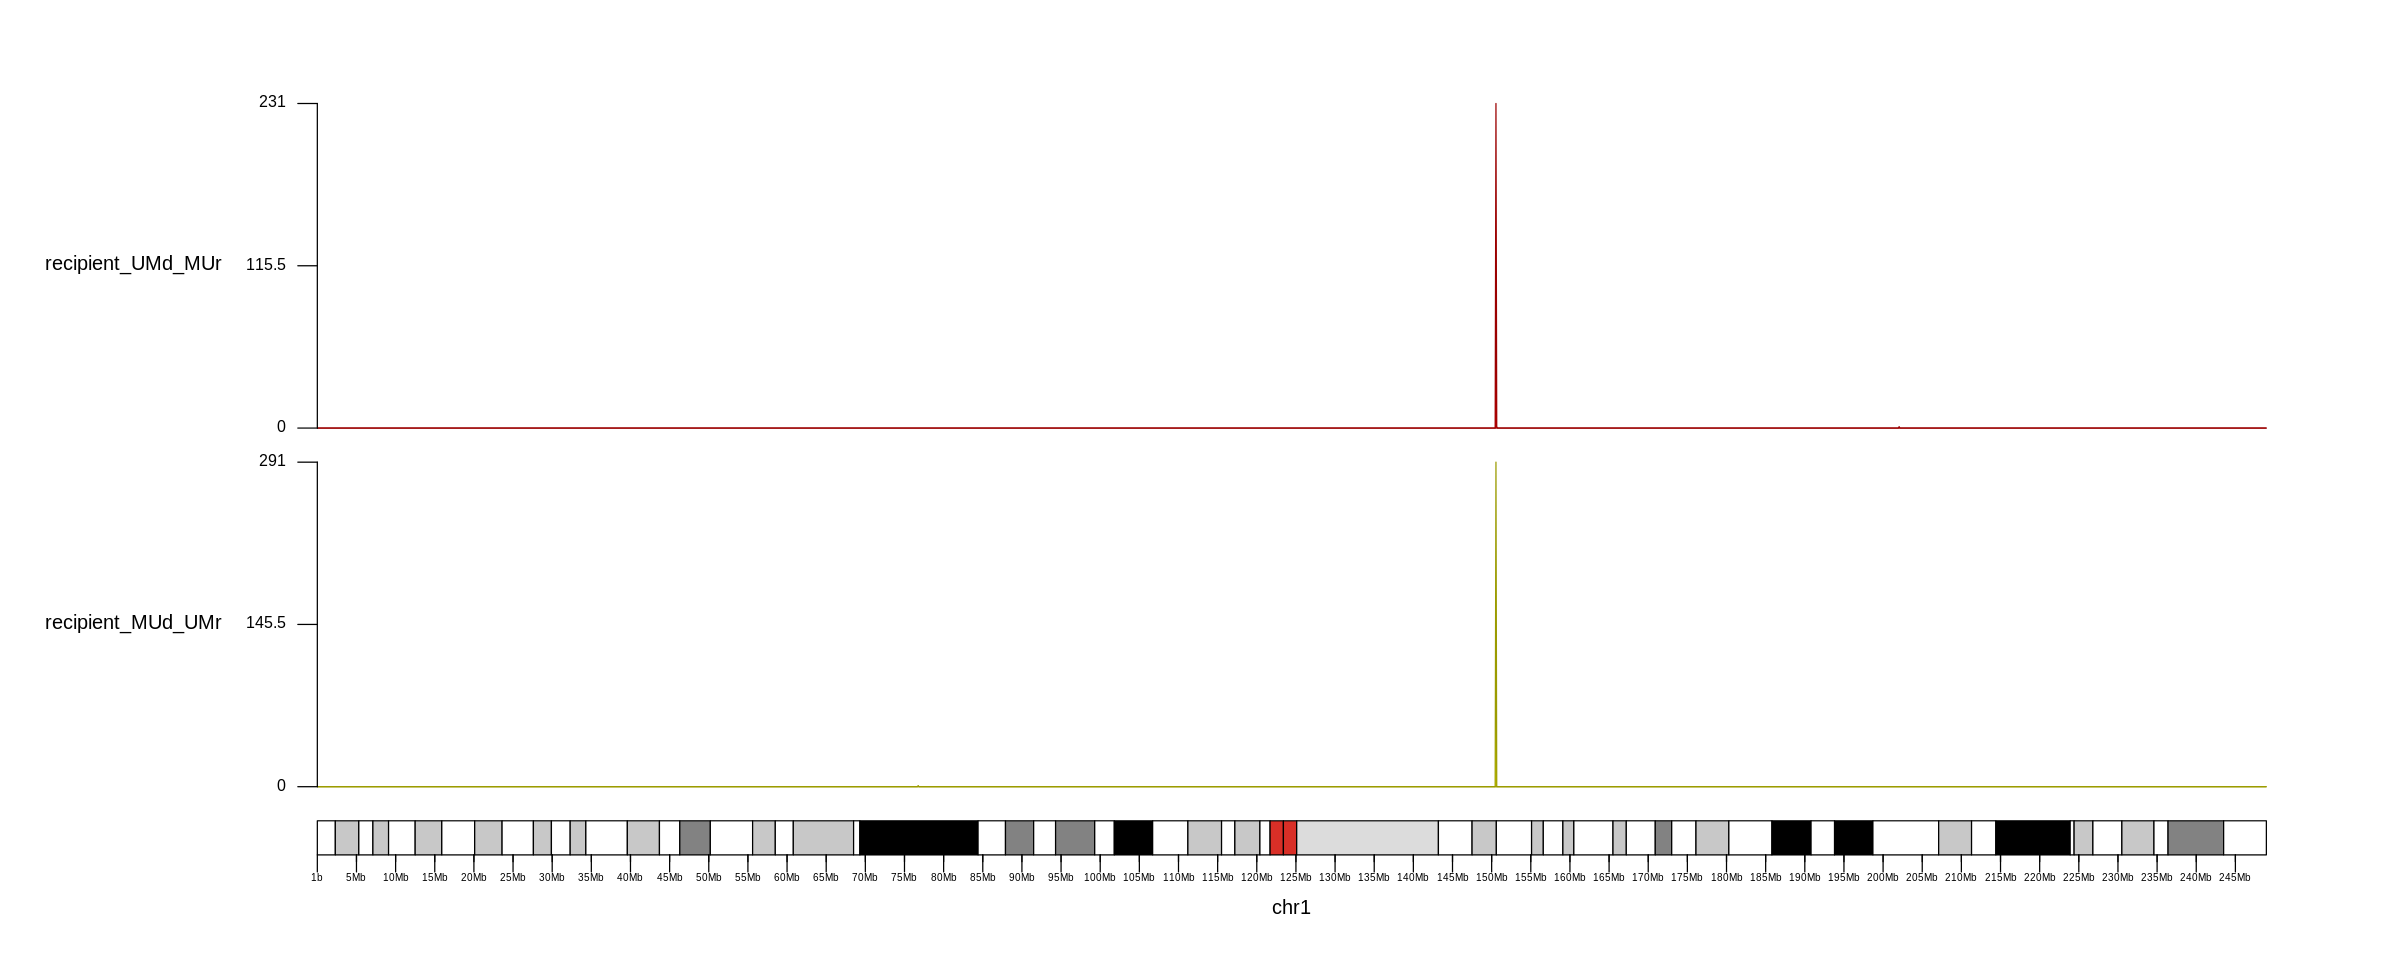

In [37]:
options(repr.plot.width=20, repr.plot.height=8)

plot.type <- 4
tracks <- 2
track_sep <- 0.05
track_width <- 1/(tracks+tracks*0.05)
window.size <- 1e5 # averaged every # reads in window
print(paste("Window size for density calculation, in (kb): ", window.size))
genome = "hg38"
chromosomes = c('chr1')

pp <- getDefaultPlotParams(plot.type=plot.type)
pp$leftmargin <- 0.13
kp <- plotKaryotype(genome=genome, plot.type = plot.type, plot.params = pp, chromosomes = chromosomes)
kpAddBaseNumbers(kp, tick.dist = window.size*50, add.units = TRUE)

track_no=1
r0 <- (track_no-1)*track_width+(track_no-1)*track_sep
r1 <- track_no*track_width+(track_no-1)*track_sep
kp <- suppressWarnings(kpPlotDensity(kp, data=reads_to_recipient_MUd_UMr.bed.gr, window.size = window.size, col="yellow", r0=r0, r1=r1))
kpAxis(kp, ymax=kp$latest.plot$computed.values$max.density, cex=0.8, r0=r0, r1=r1)
kpAddLabels(kp, labels = "recipient_MUd_UMr", r0=r0, r1=r1, label.margin = 0.04)

track_no=2
r0 <- (track_no-1)*track_width+(track_no-1)*track_sep
r1 <- track_no*track_width+(track_no-1)*track_sep
kp <- suppressWarnings(kpPlotDensity(kp, data=reads_to_recipient_UMd_MUr.bed.gr, window.size = window.size, col="red", r0=r0, r1=r1))
kpAxis(kp, ymax=kp$latest.plot$computed.values$max.density, cex=0.8, r0=r0, r1=r1)
kpAddLabels(kp, labels = "recipient_UMd_MUr", r0=r0, r1=r1, label.margin = 0.04)

[1] "Window size for density calculation, in (kb):  100"


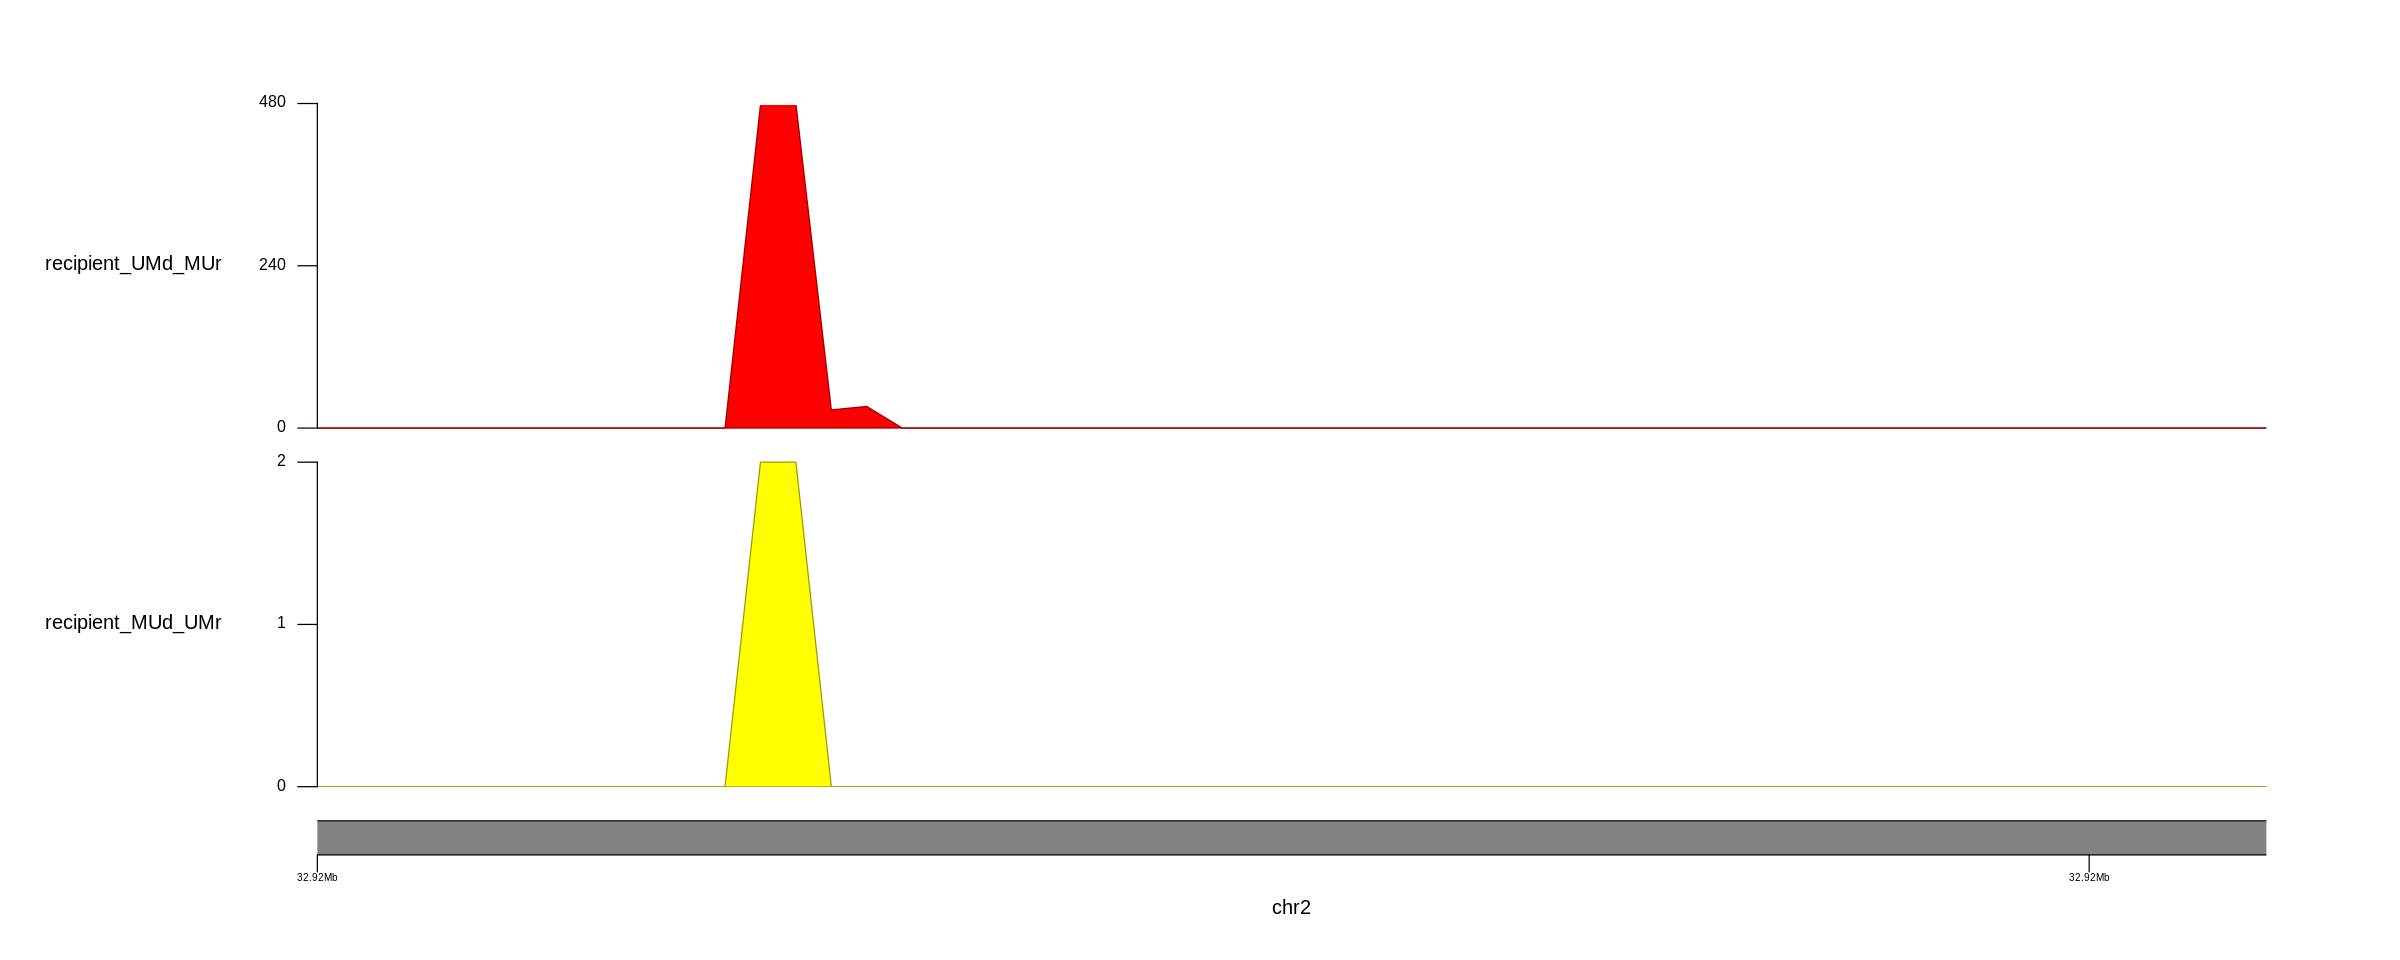

In [24]:
options(repr.plot.width=20, repr.plot.height=8)

plot.type <- 4
tracks <- 2
track_sep <- 0.05
track_width <- 1/(tracks+tracks*0.05)
window.size <- 1e2 # averaged every # reads in window
print(paste("Window size for density calculation, in (kb): ", window.size))
genome = "hg38"
chromosomes = c('chr2')

zoom.region <- toGRanges(data.frame("chr2", 32915000, 32920500))

pp <- getDefaultPlotParams(plot.type=plot.type)
pp$leftmargin <- 0.13
kp <- plotKaryotype(genome=genome, plot.type = plot.type, plot.params = pp, chromosomes = chromosomes, zoom=zoom.region)
kpAddBaseNumbers(kp, tick.dist = window.size*50, add.units = TRUE)

track_no=1
r0 <- (track_no-1)*track_width+(track_no-1)*track_sep
r1 <- track_no*track_width+(track_no-1)*track_sep
kp <- suppressWarnings(kpPlotDensity(kp, data=reads_to_recipient_MUd_UMr.bed.gr, window.size = window.size, col="yellow", r0=r0, r1=r1))
kpAxis(kp, ymax=kp$latest.plot$computed.values$max.density, cex=0.8, r0=r0, r1=r1)
kpAddLabels(kp, labels = "recipient_MUd_UMr", r0=r0, r1=r1, label.margin = 0.04)

track_no=2
r0 <- (track_no-1)*track_width+(track_no-1)*track_sep
r1 <- track_no*track_width+(track_no-1)*track_sep
kp <- suppressWarnings(kpPlotDensity(kp, data=reads_to_recipient_UMd_MUr.bed.gr, window.size = window.size, col="red", r0=r0, r1=r1))
kpAxis(kp, ymax=kp$latest.plot$computed.values$max.density, cex=0.8, r0=r0, r1=r1)
kpAddLabels(kp, labels = "recipient_UMd_MUr", r0=r0, r1=r1, label.margin = 0.04)

[1] "Window size for density calculation, in (kb):  10"


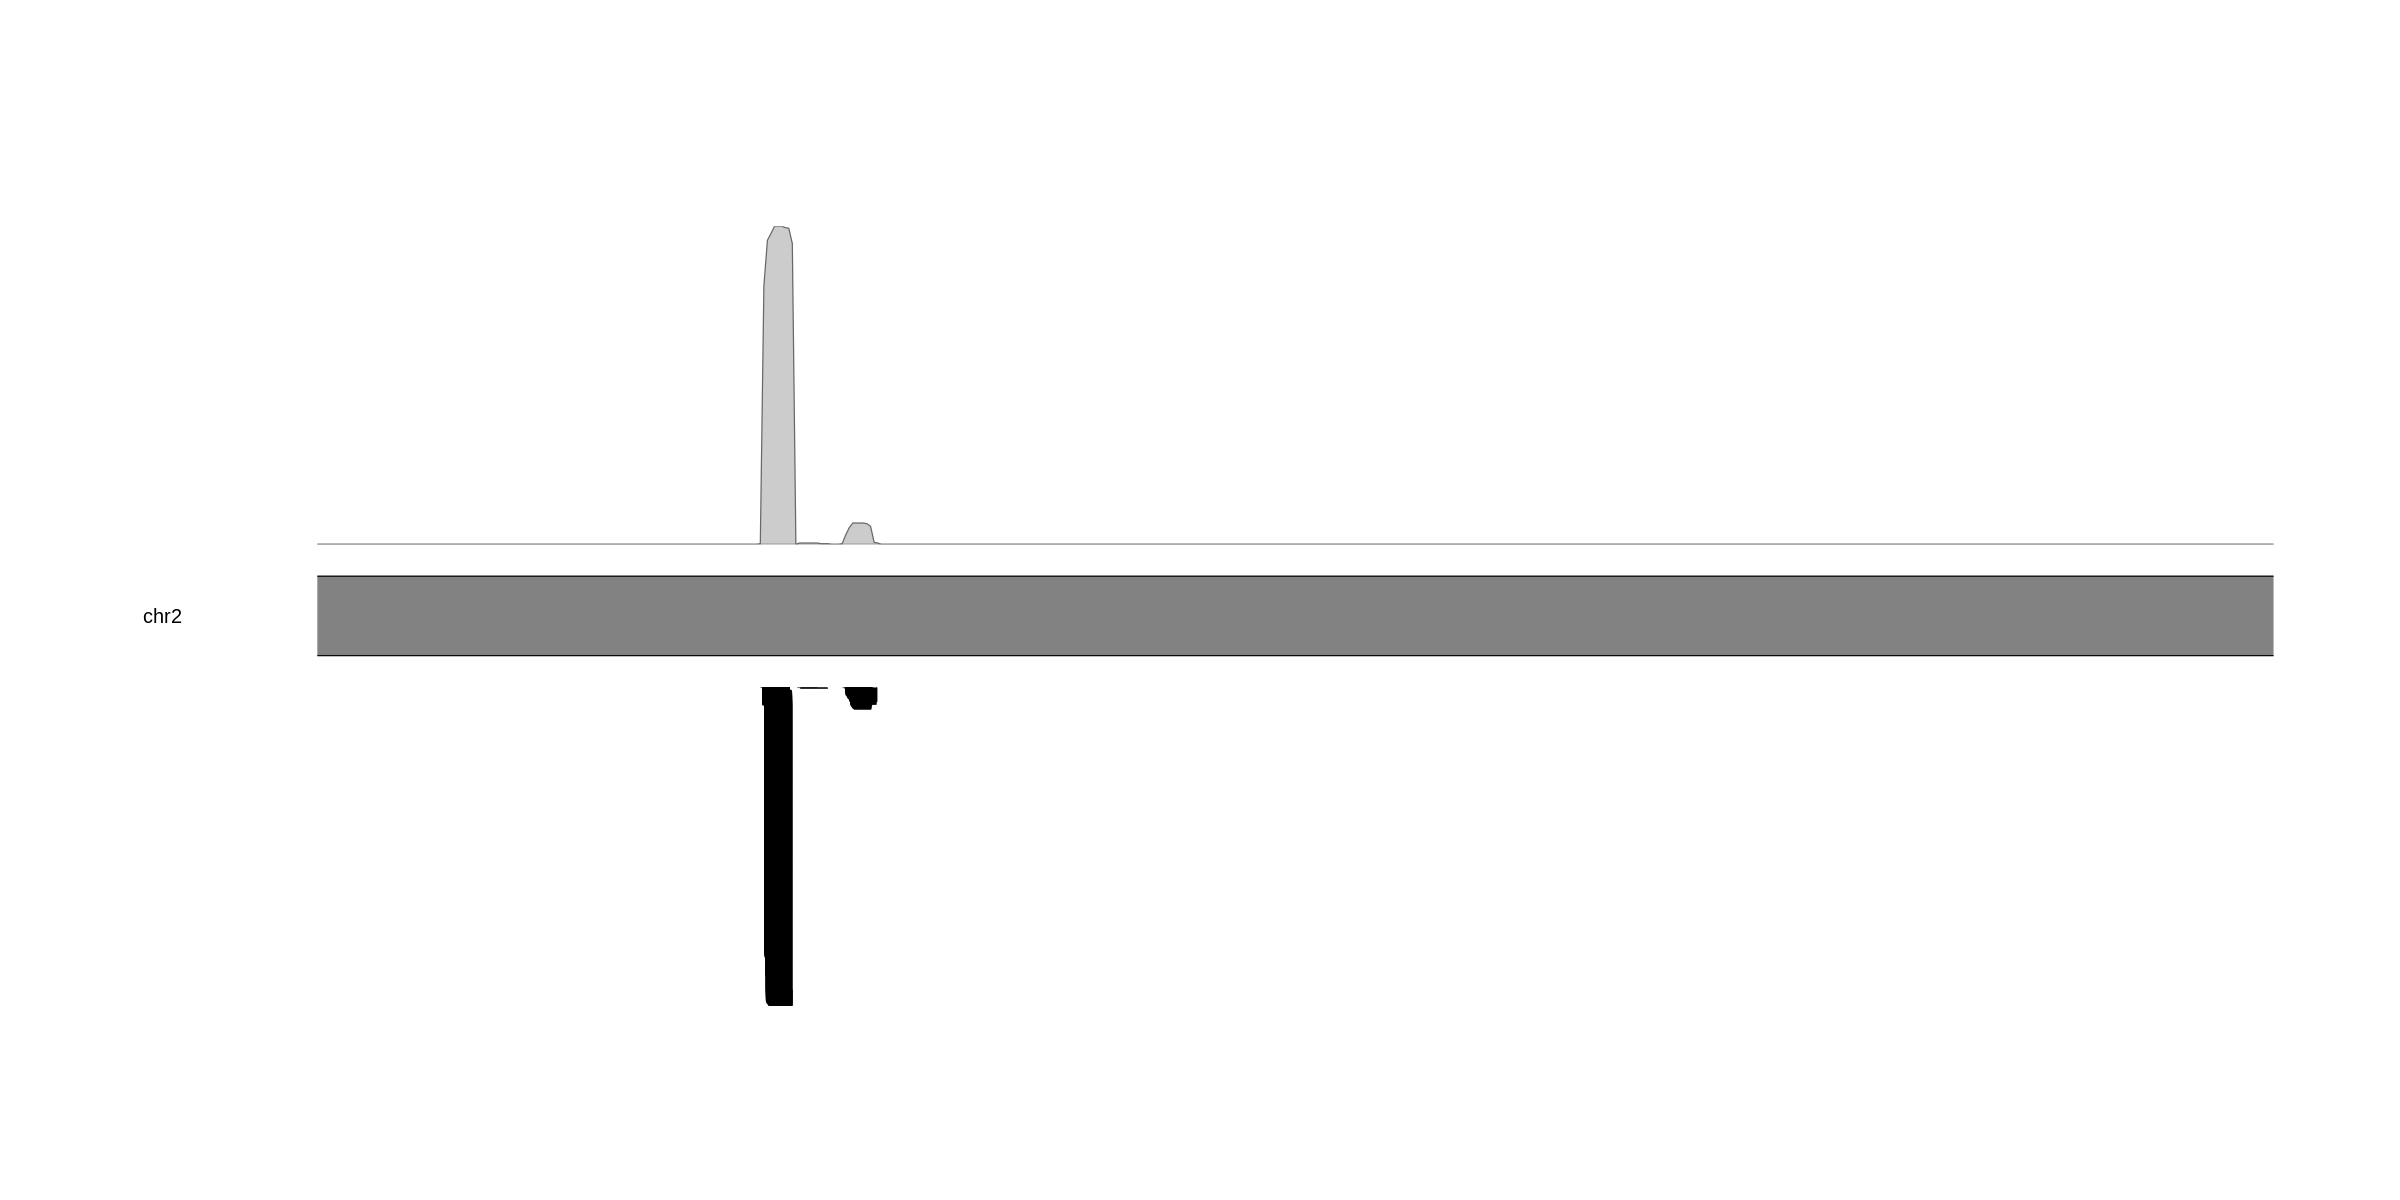

In [25]:
options(repr.plot.width=20, repr.plot.height=10)

plot.type <- 2
window.size <- 10 # averaged every # reads in window
print(paste("Window size for density calculation, in (kb): ", window.size))
genome = "hg38"

zoom.region <- toGRanges(data.frame("chr2", 32915000, 32920500))

pp <- getDefaultPlotParams(plot.type=plot.type)
pp$leftmargin <- 0.13
kp <- plotKaryotype(genome=genome, plot.type = plot.type, plot.params = pp, chromosomes = 'chr2', zoom=zoom.region)

kpPlotDensity(kp, data=reads_to_recipient_UMd_MUr.bed.gr, window.size = window.size)
kpPlotRegions(kp, data=reads_to_recipient_UMd_MUr.bed.gr, data.panel=2)

## Breakdown of species in BLAST files

In [28]:
# qseqid means Query Seq-id
#               qgi means Query GI
#              qacc means Query accesion
#           qaccver means Query accesion.version
#              qlen means Query sequence length
#            sseqid means Subject Seq-id
#         sallseqid means All subject Seq-id(s), separated by a ';'
#               sgi means Subject GI
#            sallgi means All subject GIs
#              sacc means Subject accession
#           saccver means Subject accession.version
#           sallacc means All subject accessions
#              slen means Subject sequence length
#            qstart means Start of alignment in query
#              qend means End of alignment in query
#            sstart means Start of alignment in subject
#              send means End of alignment in subject
#              qseq means Aligned part of query sequence
#              sseq means Aligned part of subject sequence
#            evalue means Expect value
#          bitscore means Bit score
#             score means Raw score
#            length means Alignment length
#            pident means Percentage of identical matches
#            nident means Number of identical matches
#          mismatch means Number of mismatches
#          positive means Number of positive-scoring matches
#           gapopen means Number of gap openings
#              gaps means Total number of gaps
#              ppos means Percentage of positive-scoring matches
#            frames means Query and subject frames separated by a '/'
#            qframe means Query frame
#            sframe means Subject frame
#              btop means Blast traceback operations (BTOP)
#           staxids means Subject Taxonomy ID(s), separated by a ';'
#         sscinames means Subject Scientific Name(s), separated by a ';'
#         scomnames means Subject Common Name(s), separated by a ';'
#        sblastnames means Subject Blast Name(s), separated by a ';'
#                 (in alphabetical order)
#        sskingdoms means Subject Super Kingdom(s), separated by a ';'
#                 (in alphabetical order) 
#            stitle means Subject Title
#        salltitles means All Subject Title(s), separated by a '&lt;&gt;'
#           sstrand means Subject Strand
#             qcovs means Query Coverage Per Subject
#           qcovhsp means Query Coverage Per HSP

In [92]:
headers <- c("org", "seqid", "qacc", "qlen", "sseqid", "sallseqid", "sgi",
             "sallgi", "sacc", "saccver", "sallacc", "slen", "qstart", "qend", "sstart",
             'send', "qseq", "sseq", "evalue", "bitscore", "score", "length", "pident",
             'nident', "mismatch", "positive", "gapopen", "gaps", "ppos", "frames",
             "qframe", "sframe", "btop", "staxid", "ssciname", "scomname", "sblastname",
             "sskingdom", "staxids", "sscinames", "scomnames", "sblastnames",
             "sskingdoms", "stitle", "salltitles", "sstrand", "qcovs", "qcovhsp", "qcovus")
blast <- read.table(reads_to_recipient_MUd_UMr.blastn, sep="\t", header=FALSE, fill = TRUE, stringsAsFactors=T)
colnames(blast) <- headers

In [93]:
# Select blast dataset columns
donor_blast <- blast[c("seqid", "qlen", "sgi",
             "saccver", "sallacc", "slen", "qstart", "qend", "sstart",
             'send', "evalue", "bitscore", "score", "length", "pident",
             'nident', "mismatch", "positive", "gapopen", "gaps", "ppos", "frames",
             "qframe", "sframe", "btop", "staxid", "ssciname", "scomname", "sblastname",
             "sskingdom", "stitle", "sstrand", "qcovs", "qcovhsp", "qcovus")]
# Subset by donor name
donor_blast <- droplevels(subset(donor_blast, ssciname == "Pseudomonas aeruginosa PAO1"))
# Subset by evalue < 1e-20 (very good blast match)
donor_blast <- subset(donor_blast, evalue < 1e-20)

In [94]:
options(repr.matrix.max.cols=150, repr.matrix.max.rows=200)
dim(donor_blast)
head(donor_blast)

[1]  0 35

seqid,qlen,sgi,saccver,sallacc,slen,qstart,qend,sstart,send,evalue,bitscore,score,length,pident,nident,mismatch,positive,gapopen,gaps,ppos,frames,qframe,sframe,btop,staxid,ssciname,scomname,sblastname,sskingdom,stitle,sstrand,qcovs,qcovhsp,qcovus
<fct>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>


In [95]:
donor_blast <- donor_blast %>% group_by(seqid) %>% slice_min(n = 2, order_by = evalue) %>% unique()

In [96]:
subset(donor_blast, seqid == "SRR5377828.1437390")

seqid,qlen,sgi,saccver,sallacc,slen,qstart,qend,sstart,send,evalue,bitscore,score,length,pident,nident,mismatch,positive,gapopen,gaps,ppos,frames,qframe,sframe,btop,staxid,ssciname,scomname,sblastname,sskingdom,stitle,sstrand,qcovs,qcovhsp,qcovus
<fct>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>


In [106]:
## NEED TO SUBSET RESULTS TO THE TOP 5 EVALUES FOUND FOR EACH READ

In [107]:
# Create a count of events grouped by the following
donor_blast <- count(donor_blast, seqid, sscinames, sort = TRUE, name = 'count')
# Rearrange the factors so that we can order them by seqid
donor_blast <- within(donor_blast, seqid <- factor(seqid, levels=names(sort(table(seqid), decreasing=FALSE))))

In [108]:
head(donor_blast)

seqid,sscinames,count
<fct>,<fct>,<int>
SRR5377828.1437390,Pseudomonas aeruginosa PAO1,2
SRR5377828.1575507,Pseudomonas aeruginosa PAO1,2
SRR5377828.201270,Pseudomonas aeruginosa PAO1,2
SRR5377828.7094691,Pseudomonas aeruginosa PAO1,2


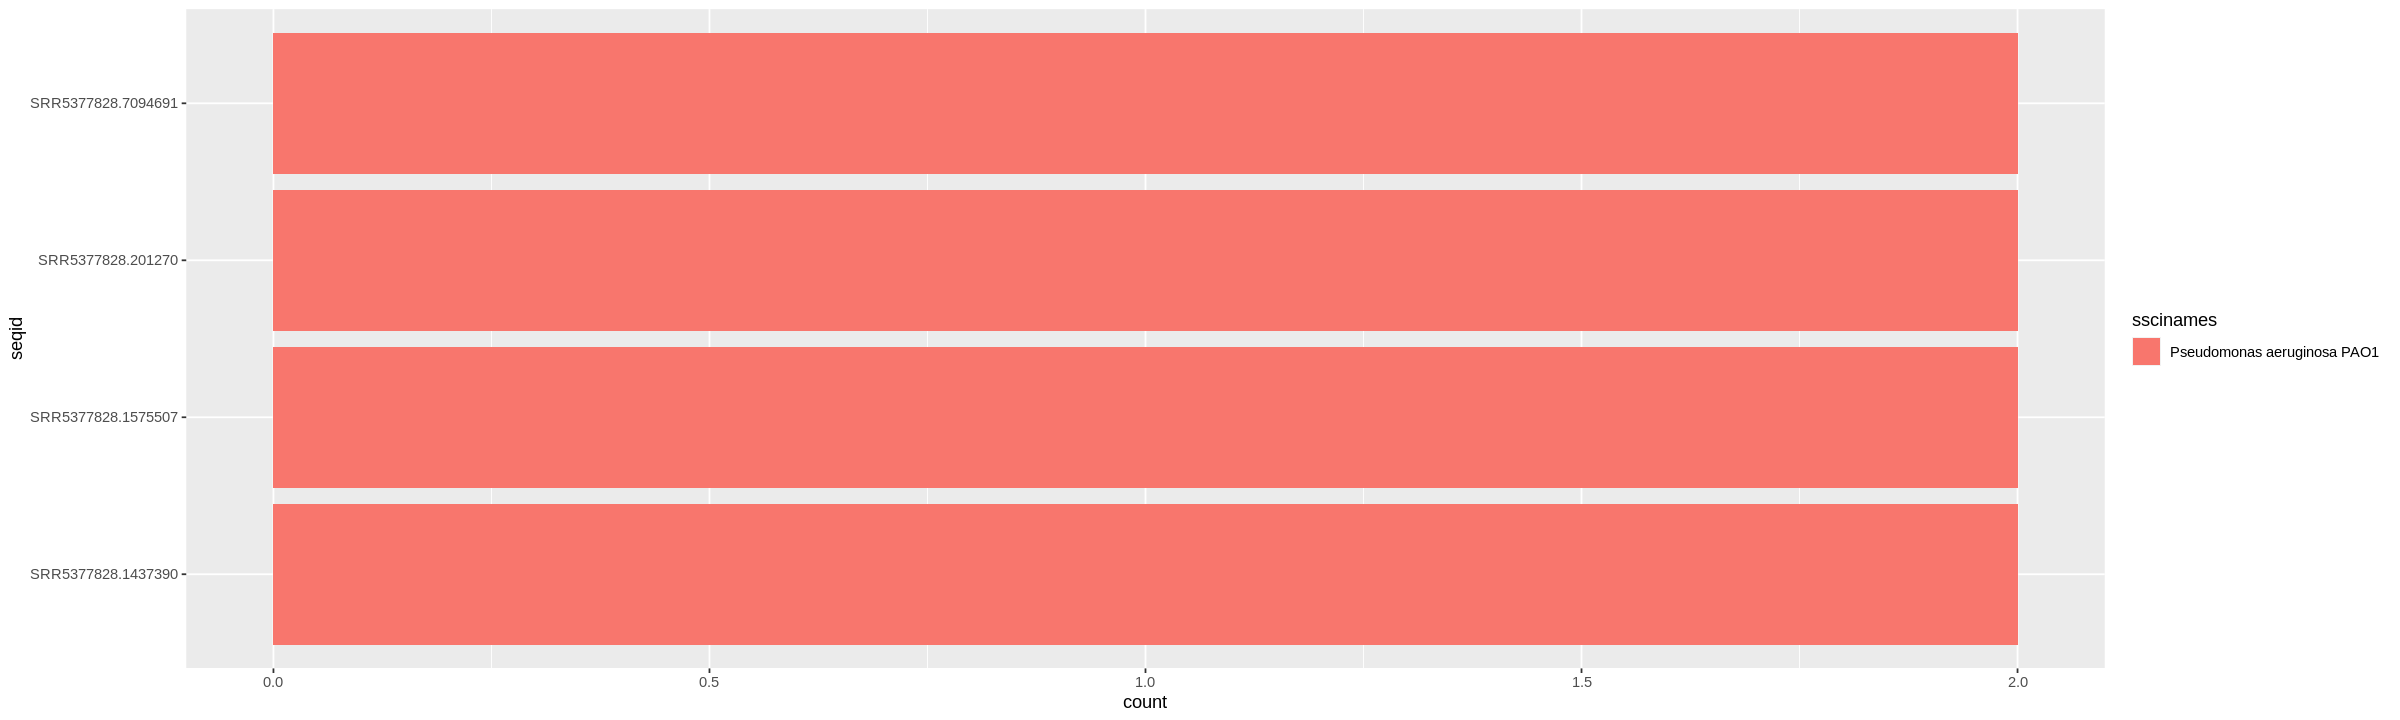

In [109]:
options(repr.plot.width=20, repr.plot.height=6)
ggplot(donor_blast, aes(fill=sscinames, y=seqid, x=count)) + 
    geom_bar(position="stack", stat="identity")

## Visualize reads between donor and recipient genomes

## Finding areas of interest

## Visualize areas of interest